In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('beer_reviews.csv', header=0)
print(data.shape)
print(list(data.columns))
data.head()

(1586691, 13)
['id_cerveceria', 'nombre_cerveceria', 'fecha_calificacion', 'calificacion_total', 'calificacion_aroma', 'calificacion_apariencia', 'usuario', 'tipo_cerveza', 'calificacion_paleta', 'calificacion_sabor', 'nombre_cerveza', 'grado_alcohol', 'id_cerveza']


,id_cerveceria,nombre_cerveceria,fecha_calificacion,calificacion_total,calificacion_aroma,calificacion_apariencia,usuario,tipo_cerveza,calificacion_paleta,calificacion_sabor,nombre_cerveza,grado_alcohol,id_cerveza
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
#1094323 se corrigió manualmante debido a que ten;ia doble coma

In [5]:
#Se crea un subset de datos con mayor cantidad de calificaciones a un umbral.
#Este umbral se fija en 500 pero puede ser variado. 
n=500
repeticiones_nombre=data['nombre_cerveza'].value_counts()
repeticiones_nombre=repeticiones_nombre[repeticiones_nombre>n]
nombres=repeticiones_nombre.index
#Data reducio solo tiene las cervezas con más de 500 calificaciones por nombre
data_reducido = data[data['nombre_cerveza'].isin(nombres)]

# Parte 1) Resumen de los datos

Se arranca por realizar un pequeño resumen de los datos mostrandolas cervezas y compañías con mayores calificaciones.

In [6]:
#Se realizan conteos por marca y nombre
conteos_marcas=data['nombre_cerveceria'].value_counts()
conteos_nombre=data['nombre_cerveza'].value_counts()

print("Las tres marcas con mayor cantidad de calificaciones fueron: ")
print("")
print(conteos_marcas[0:3])
print("")
print("----------------------------------------------------")
print("")
print("Las tres cervezas con mayor cantidad de calificaciones fueron: ")
print(conteos_nombre[0:3])
print("")
print("----------------------------------------------------")
print("")
print("Se calificaron " +str(conteos_marcas.size) +" marcas y " +str(conteos_nombre.size) + " cervezas.")
print("")
print("----------------------------------------------------")
print("")


Las tres marcas con mayor cantidad de calificaciones fueron: 

Boston Beer Company (Samuel Adams)    39444
Dogfish Head Brewery                  33839
Stone Brewing Co.                     33066
Name: nombre_cerveceria, dtype: int64

----------------------------------------------------

Las tres cervezas con mayor cantidad de calificaciones fueron: 
90 Minute IPA                          3290
India Pale Ale                         3130
Old Rasputin Russian Imperial Stout    3111
Name: nombre_cerveza, dtype: int64

----------------------------------------------------

Se calificaron 5742 marcas y 56857 cervezas.

----------------------------------------------------



# Parte 2) Resumen respecto a grados de alcohol

Siguiendo, se realiza un resumen respecto a los grados de alcohol. Se muestra la cerveza con mayor porcentaje de alcohol, el promedio de grado de alcohol, y el valor más probable del mismo. Además se muestra la distribución de valores de grados de alcohol.


In [11]:
ordenadas_grados=data.sort_values(by=['grado_alcohol'],ascending=False)
print("La cerveza cuyo porcentaje de alcohol es más alto es: "+str(ordenadas_grados.iloc[0,10])+ 
     " producida por la cervecería " +str(ordenadas_grados.iloc[0,1]), "con un porcentaje de alcohol de "
     +str(ordenadas_grados.iloc[0,11]))
print("")
print("----------------------------------------------------")
print("")
print("El promedio de grados de alcohol de las cervezas fue de " 
    + str(np.round(np.mean(ordenadas_grados['grado_alcohol']),2)))
print("")
print("----------------------------------------------------")
print("")
print("El valor más probable de grados de alcohol de las cervezas es de " 
      +str(data['grado_alcohol'].value_counts().index[0]))


La cerveza cuyo porcentaje de alcohol es más alto es: Schorschbräu Schorschbock 57% producida por la cervecería Schorschbräu con un porcentaje de alcohol de 57.7

----------------------------------------------------

El promedio de grados de alcohol de las cervezas fue de 7.04

----------------------------------------------------

El valor más probable de grados de alcohol de las cervezas es de 5.0


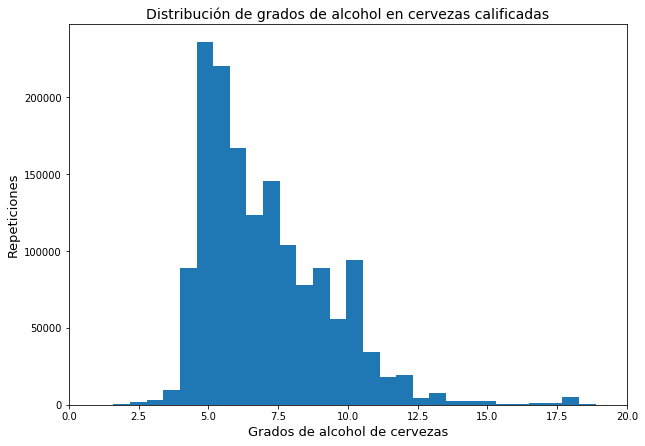

In [12]:
ordenadas_grados=data.sort_values(by=['grado_alcohol'],ascending=False).dropna()
bins=np.linspace(1,60,100)
plt.figure(figsize=(10,7))
plt.hist(ordenadas_grados['grado_alcohol'],bins)
plt.xlim(0,20)
plt.xlabel("Grados de alcohol de cervezas",fontsize=13)
plt.ylabel("Repeticiones",fontsize=13)
plt.title('Distribución de grados de alcohol en cervezas calificadas',fontsize=14)
plt.show()

# Parte 3) Recomendación de tres cervezas

Se realiza la recomendación de tres cervezas usando tres criterios. El primer criterio es la cerevza con mejor promedio de calificación total. El segundo criterio fue buscar la cerveza con menor cantidad de calificaciones negativas, aumentando las probabilidades de que al usuario no le vaya a disgustar la cerveza. Finalmente se busca la cerveza con mayor cantidad de calificaciones posotivas. Esta puede ser una elección más arriesgada que la segunda, pero está basada en criterio de popularidad. Las últimas dos escogencias se realizan sobre las 10 mejores cervezas calificadas. Además se toman únicamente cervezas con más de 500 calificaciones. Este umbral puede ser cambiado según se necesite. 

In [13]:
#Se descartan las columnas irrelevantes para el proceso
promedios=data_reducido.drop(['id_cerveceria','nombre_cerveceria',
                              'fecha_calificacion','usuario','grado_alcohol','id_cerveza'], axis=1)
#Se promedian las cervezas agrupándolas por nombre
promedios=promedios.groupby(['nombre_cerveza']).mean()
#Se ordenan de mayor a menor calificación total promedio
promedios=promedios.sort_values(by=['calificacion_total'],ascending=False)
#Se eligen los 10 mejores promedios de calificación total
promedios=promedios[0:10]

### Recomendación 1: La mejor calificada

In [14]:
print("La primera recomendación es la cerveza: " + promedios[0:1].index.values[0])

La primera recomendación es la cerveza: Trappist Westvleteren 12


### Recomendación 2: De las 10 mejores calificadas, la que menor cantidad de calificaciones menores o iguales a 3 tiene. Recomendación para "ir a la fija"

In [15]:
resp=""
menor=9999
#recorrido buscando la cerveza con menor cantidad de calificaciones menores o iguales a 3. 
for i in range (1,9):
    conteos_i=(data[data['nombre_cerveza']==promedios[1:10].index.values[i]]['calificacion_total']).value_counts()
    if(conteos_i[conteos_i.index<3.5].sum()<menor):
        menor=conteos_i[conteos_i.index<3.5].sum()
        resp=promedios[1:10].index.values[i]
print("La segunda recomendación es la cerveza: " + resp)

La segunda recomendación es la cerveza: Founders CBS Imperial Stout


### Recomendación 3: De las mejores 10 calificadas, la que mayor cantidad de calificaciones mayores o ifuales a 4 tienen. Recomendación de "la popular"

In [16]:
resp=""
mayor=0
#recorrido buscando la cerveza con mayor cantidad de calificaciones superiores o iguales a 4
for i in range (1,9):
    conteos_i=(data[data['nombre_cerveza']==promedios[1:10].index.values[i]]['calificacion_total']).value_counts()
    if(conteos_i[conteos_i.index>3.5].sum()>mayor):
        menor=conteos_i[conteos_i.index>3.5].sum()
        resp=promedios[1:10].index.values[i]
print("La tecerca recomendación es la cerveza: "+ resp)

La tecerca recomendación es la cerveza: Supplication


# Parte 4) Regresion lineal. 

Para identificar cuales de los 4 parámetros tienen mayor peso a la hora de escoger una cerveza se realiza una regresión lineal usando sklearn. 

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
a=LinearRegression(normalize=True)

In [19]:
#Se crea el set de datos X
data_x=data[['calificacion_sabor','calificacion_aroma','calificacion_paleta','calificacion_apariencia']]

In [20]:
#Genero un fit usando como variable Y la calificación total y como variables x los cuatro parámetros. 
a.fit(data_x,data['calificacion_total'].values.reshape(-1, 1))

print("Los pesos para las variables fueron respectivamente: ")
print("Sabor: "+ str(round(a.coef_[0,0],4)))
print("Aroma: "+ str(round(a.coef_[0,1],4)))
print("Paleta: "+ str(round(a.coef_[0,2],4)))
print("Apariencia: "+ str(round(a.coef_[0,3],4)))

Los pesos para las variables fueron respectivamente: 
Sabor: 0.5515
Aroma: 0.0478
Paleta: 0.2585
Apariencia: 0.0359


De este modo, el factor más determinante a la hora de elegir la calidad de una cerveza es el sabor. Seguido se encuentra paleta. Tanto la apariencia como el aroma parecieran estar áltamente correlacionados a sabor y paleta, haciendo que tengan poco peso dentro del modelo. Para entender mejor los pesos se realiza el set de histogramas a continuación. 

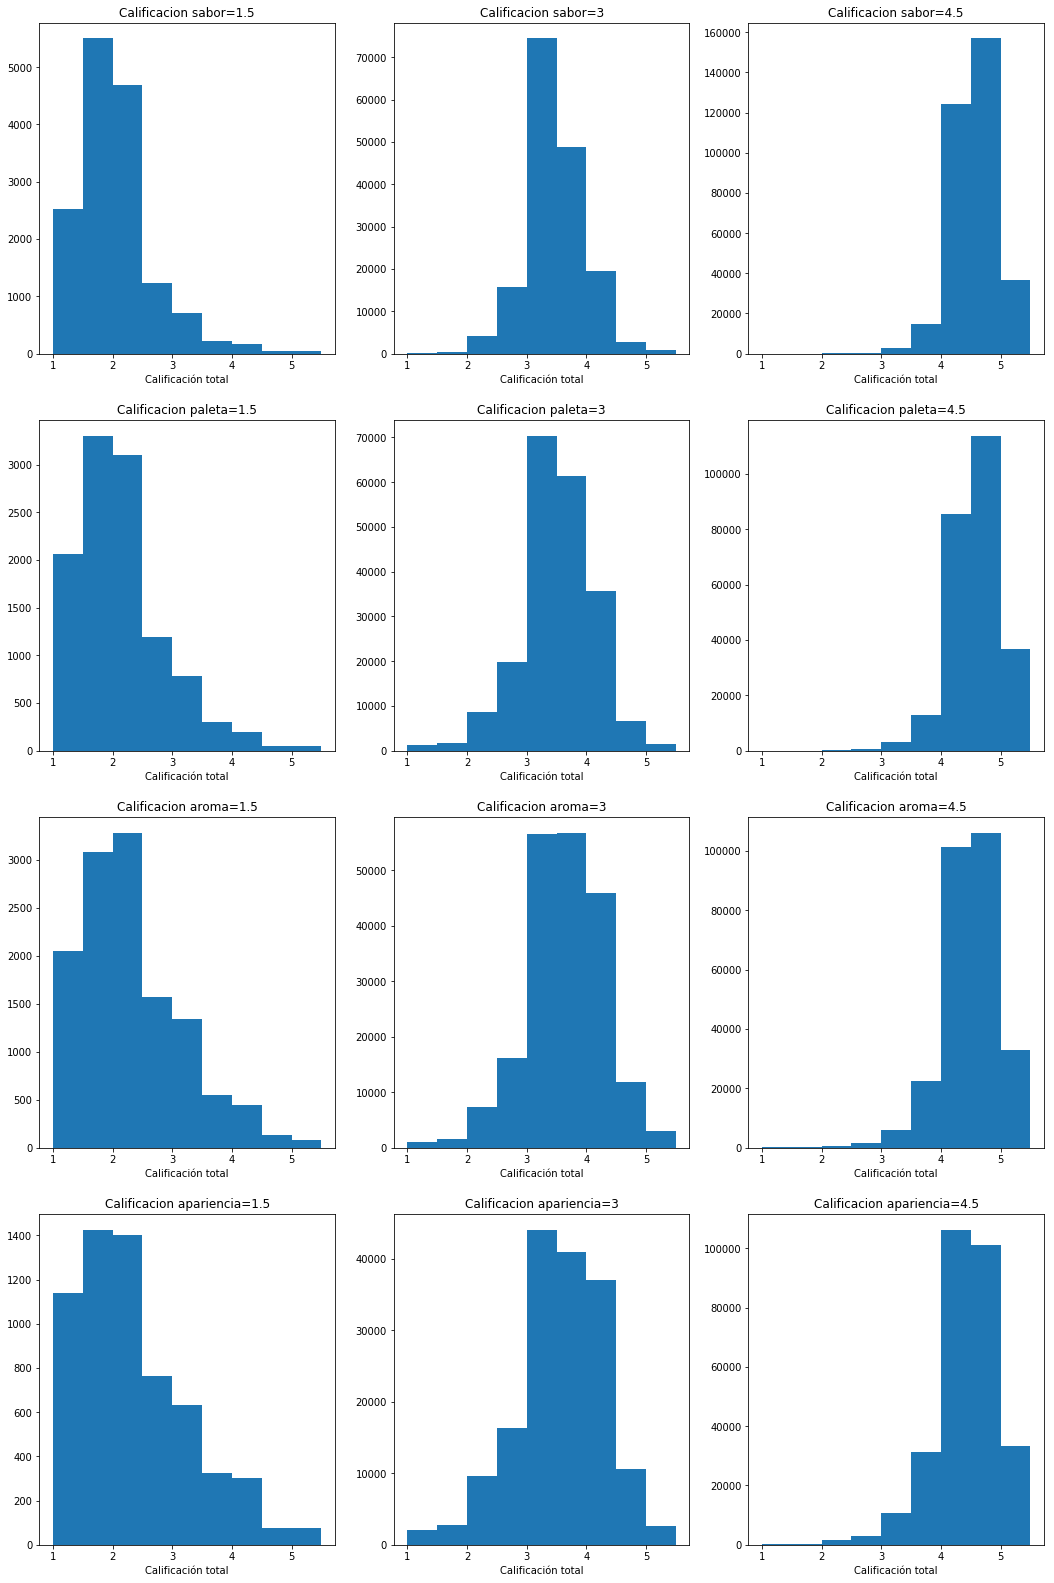

In [21]:
bins=np.linspace(1,5.5,10)
plt.figure(figsize=(18,28))
plt.subplot(4,3,1)
prueba=data[data['calificacion_sabor']==1.5]
plt.hist(prueba['calificacion_total'],bins)
plt.title('Calificacion sabor=1.5')
plt.xlabel('Calificación total')
plt.subplot(4,3,2)
prueba=data[data['calificacion_sabor']==3]
plt.hist(prueba['calificacion_total'],bins)
plt.title('Calificacion sabor=3')
plt.xlabel('Calificación total')
plt.subplot(4,3,3)
prueba=data[data['calificacion_sabor']==4.5]
plt.hist(prueba['calificacion_total'],bins)
plt.title('Calificacion sabor=4.5')
plt.xlabel('Calificación total')
plt.subplot(4,3,4)
prueba=data[data['calificacion_paleta']==1.5]
plt.hist(prueba['calificacion_total'],bins)
plt.title('Calificacion paleta=1.5')
plt.xlabel('Calificación total')
plt.subplot(4,3,5)
prueba=data[data['calificacion_paleta']==3]
plt.hist(prueba['calificacion_total'],bins)
plt.title('Calificacion paleta=3')
plt.xlabel('Calificación total')
plt.subplot(4,3,6)
prueba=data[data['calificacion_paleta']==4.5]
plt.hist(prueba['calificacion_total'],bins)
plt.title('Calificacion paleta=4.5')
plt.xlabel('Calificación total')
plt.subplot(4,3,7)
prueba=data[data['calificacion_aroma']==1.5]
plt.hist(prueba['calificacion_total'],bins)
plt.title('Calificacion aroma=1.5')
plt.xlabel('Calificación total')
plt.subplot(4,3,8)
prueba=data[data['calificacion_aroma']==3]
plt.hist(prueba['calificacion_total'],bins)
plt.title('Calificacion aroma=3')
plt.xlabel('Calificación total')
plt.subplot(4,3,9)
prueba=data[data['calificacion_aroma']==4.5]
plt.hist(prueba['calificacion_total'],bins)
plt.title('Calificacion aroma=4.5')
plt.xlabel('Calificación total')
plt.subplot(4,3,10)
prueba=data[data['calificacion_apariencia']==1.5]
plt.hist(prueba['calificacion_total'],bins)
plt.title('Calificacion apariencia=1.5')
plt.xlabel('Calificación total')
plt.subplot(4,3,11)
prueba=data[data['calificacion_apariencia']==3]
plt.hist(prueba['calificacion_total'],bins)
plt.title('Calificacion apariencia=3')
plt.xlabel('Calificación total')
plt.subplot(4,3,12)
prueba=data[data['calificacion_apariencia']==4.5]
plt.hist(prueba['calificacion_total'],bins)
plt.title('Calificacion apariencia=4.5')
plt.xlabel('Calificación total')
plt.show()

En el set de gráficas se muestran tres histogramas para cada calificación. De estos tres histogramas el primero corresponde las calificaciones totales para una calificación de 1.5 en en el criterio en cuestión, seguido de una calificación de 3 y una de 4.5. Los histogramas se meustran estrechos para las variables con mayores pesos y anchos para las variables con menores pesos. Esto muestra que la calificación total de un usuario está en gran medida más determinada por los valores con mayores pesos. Por ejemplo ráramente un usuario que calificó sabor con 1.5, calificaría general con 5 al contrario de apariencia en la cual varios usuarios con calificaciones de apariencia de 1.5 calificaron general en 5. 

# Parte 5) Escogencia de un tipo de cerveza basado en preferencia por apariencia y aroma. 

Para escoger una cerveza basándose en el aroma y la apareincia, se busca maximizar la calificación promedio de estas dos variables, independientemente del sabor y paleta. Una posible maximización es mediante la suma. Así, se busca un tipo de cerveza cuya suma de promedios de apariencia y aroma sean máximos. Se usa el set de datos reducidos con más de 500 calificaciones por cerveza. 

In [22]:
#Se remueven las variables que no se usan
promedios=data_reducido.drop(['id_cerveceria','nombre_cerveceria','fecha_calificacion','usuario','grado_alcohol','id_cerveza','nombre_cerveza'], axis=1)
#Se promedian y agrupan las cervezas por su tipo
promedios=promedios.groupby(['tipo_cerveza']).mean()
#Se genera una nueva columna como la suma de loos promedios de aroma y apariencia
promedios['suma']=promedios['calificacion_aroma']+promedios['calificacion_apariencia']
#Se organizan los datos desendentemente 

promedios.sort_values(by=['suma'],ascending=False)[0:1]
print("Basado en maximizar la calificación de paleta y apariencia, se deberían escoger cervezas de tipo: "
      + str(promedios.sort_values(by=['suma'],ascending=False)[0:1].index[0]))

Basado en maximizar la calificación de paleta y apariencia, se deberían escoger cervezas de tipo: Quadrupel (Quad)


# Parte 6) Función que elige cerveza

Ahora se busca una función que recomiende al usuario una cerveza basándose en los pesos que él cree que debe tener cada componente. Se genera un nuevo promedio ponderado donde los pesos están dados por los pesos normalizados ingresados por el usuario. Con el fin de poder generar un proceso de aprendizaje se crea un vector de pesos, el cual puede irse ajustando usando un "backward propagation" con el fin de mejorar el modelo. Estos pesos representan en cierta forma una corrección basada en qué tan importante realmente los usuarios consideran que es un parámetro de forma inconciente. Se necesitarían datos de entranamiento para poder corregir estos pesos, en donde se tenga una lista de los pesos que los usuarios creen que dan a las cervezas y una calificación total de dicha cerveza. Este vector de pesos corregidos se deja en (1,1,1,1) por ahora. 

In [23]:
#Vector usado para la corrección de pesos
pesos_correccion=[1,1,1,1]
def dar_cerveza_usuario(peso_aroma,peso_apariencia,peso_paleta,calificacion_sabor):
    
    vector_pesos=np.array([peso_aroma,peso_apariencia,peso_paleta,calificacion_sabor])
    vector_pesos=pesos_correccion*vector_pesos
    #Se normaliza el vector de pesos con corrección incluida.
    vector_pesos=vector_pesos/(sum(vector_pesos))
    promedios=data_reducido.drop(['id_cerveceria','nombre_cerveceria','fecha_calificacion','usuario','grado_alcohol','id_cerveza','tipo_cerveza'], axis=1)
    promedios=promedios.groupby(['nombre_cerveza']).mean()
    #se encuentra un valor de calificación ponderado usando los pesos del usuario
    promedios=promedios[['calificacion_aroma','calificacion_apariencia','calificacion_paleta','calificacion_sabor']]*vector_pesos
    #Se halla un nuevo puntaje total, de modo que cuando este se elija la cerveza con el máximo de estos valores
    promedios['nuevo_puntaje']=promedios['calificacion_aroma']+promedios['calificacion_apariencia']+promedios['calificacion_paleta']+promedios['calificacion_sabor']
    promedios=promedios.drop(['calificacion_aroma','calificacion_apariencia','calificacion_paleta','calificacion_sabor'],axis=1)
    return(promedios.sort_values(by=['nuevo_puntaje'],ascending=False)[0:1])


In [24]:
#Realizo prueba con mayor peso en paleta
dar_cerveza_usuario(1,1,60,1)

,nuevo_puntaje
nombre_cerveza,
Trappist Westvleteren 12,4.630971


In [25]:
#Realizo prueba con mayor peso en apariencia
dar_cerveza_usuario(1,60,1,1)

,nuevo_puntaje
nombre_cerveza,
The Abyss,4.589741


In [26]:
#Realizo prueba con valores aleatorios
dar_cerveza_usuario(100,50,90,20)

,nuevo_puntaje
nombre_cerveza,
Pliny The Younger,4.638903
